### Avaiation Modeling

Exploring data to confirm if we can predict safest airlines.

In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler

In [564]:
df = pd.read_csv('../data/clean_aviation_data.csv')

In [565]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [566]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_type            559 non-null    object 
 1   event_date            559 non-null    object 
 2   tail_number           559 non-null    object 
 3   highest_injury_level  559 non-null    object 
 4   fatal_injury_count    559 non-null    int64  
 5   serious_injury_count  559 non-null    int64  
 6   minor_injury_count    559 non-null    int64  
 7   probable_cause        559 non-null    object 
 8   latitude              559 non-null    float64
 9   longitude             559 non-null    float64
 10  airport_id            559 non-null    object 
 11  operator              559 non-null    object 
 12  make                  559 non-null    object 
 13  aircraft_damage       559 non-null    object 
 14  model                 559 non-null    object 
dtypes: float64(2), int64(3)

In [568]:
df['aircraft_damage'].value_counts()

aircraft_damage
no_damage      205
Minor          192
Substantial    154
Destroyed        8
Name: count, dtype: int64

In [569]:
df.isnull().sum()

event_type              0
event_date              0
tail_number             0
highest_injury_level    0
fatal_injury_count      0
serious_injury_count    0
minor_injury_count      0
probable_cause          0
latitude                0
longitude               0
airport_id              0
operator                0
make                    0
aircraft_damage         0
model                   0
dtype: int64

In [570]:
df['operator'].value_counts()

operator
american       129
delta          102
united          89
southwest       62
continental     54
us airways      53
alaska          22
frontier        15
jetblue         11
hawaiian         7
allegiant        6
spirit           5
sun country      4
Name: count, dtype: int64

In [571]:
#df[df['operator'] == 'federal express']

In [572]:
df.shape

(559, 15)

# Logistic Regression

In [574]:
df['operator'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 559 entries, 0 to 558
Series name: operator
Non-Null Count  Dtype 
--------------  ----- 
559 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [575]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [576]:
# convert airlines into binary labels
df['operator'] = df['operator'].str.replace('alaska', 'budget')

In [577]:
df['operator'] = df['operator'].str.replace('frontier', 'budget')

In [578]:
df['operator'] = df['operator'].str.replace('jetblue', 'budget')

In [579]:
df['operator'] = df['operator'].str.replace('allegiant', 'budget')

In [580]:
df['operator'] = df['operator'].str.replace('spirit', 'budget')

In [581]:
df['operator'] = df['operator'].str.replace('sun country', 'budget')

In [582]:
df['operator'] = df['operator'].str.replace('southwest', 'budget')

In [583]:
df['operator'].value_counts()

operator
american       129
budget         125
delta          102
united          89
continental     54
us airways      53
hawaiian         7
Name: count, dtype: int64

In [584]:
df['operator'] = df['operator'].str.replace('american', 'non_budget')

In [585]:
df['operator'] = df['operator'].str.replace('delta', 'non_budget')

In [586]:
df['operator'] = df['operator'].str.replace('united', 'non_budget')

In [587]:
df['operator'] = df['operator'].str.replace('continental', 'non_budget')

In [588]:
df['operator'] = df['operator'].str.replace('hawaiian', 'non_budget')

In [589]:
df['operator'] = df['operator'].str.replace('us airways', 'non_budget')

In [590]:
df['operator'].value_counts()

operator
non_budget    434
budget        125
Name: count, dtype: int64

In [591]:
df['operator'] = df['operator'].map({'budget': 1, 'non_budget':0})

df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,0,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,0,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,1,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,1,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,1,airbus,no_damage,A320


## Logistic Regression - Injury Count ONLY

In [593]:
 

X = df[['fatal_injury_count', 'serious_injury_count', 'minor_injury_count']]
y = df['operator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42, stratify=y)

In [594]:
y.value_counts(normalize=True)

operator
0    0.776386
1    0.223614
Name: proportion, dtype: float64

In [595]:
lr = LogisticRegression()


In [596]:
lr.fit(X_train, y_train)

LogisticRegression()

In [597]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [598]:
lr.score(X_train, y_train)

0.7829977628635347

In [599]:
lr.score(X_test, y_test)

0.7767857142857143

### Standard Scaler


In [601]:
#ss = StandardScaler()

#X_train_ss = ss.fit_transform(X_train)

#X_test_ss = ss.transform(X_test)

## Logistic Regression CountVectorizer

In [603]:
X = df['probable_cause']
y = df['operator']

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42, stratify=y)

In [605]:
cvec = CountVectorizer(stop_words='english')

In [606]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [607]:
pipe_params = {
    'cvec__max_features': [100,200,300],
    'cvec__stop_words': ['english'],
    'cvec__min_df': [2,4],
    'cvec__max_df': [0.98, 0.95]
}

In [608]:
gs = GridSearchCV(pipe,
                 pipe_params,
                 n_jobs = -1)

gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7583270911360798


{'cvec__max_df': 0.98,
 'cvec__max_features': 300,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english'}

In [609]:
preds = gs.predict(X_test)

In [610]:
# Accuracy
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9194630872483222
0.7232142857142857


In [611]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

spec = tn / (tn + fp)
print(f'Our model specificity: {spec}')

Our model specificity: 0.896551724137931


In [612]:
fp, fn

(9, 22)

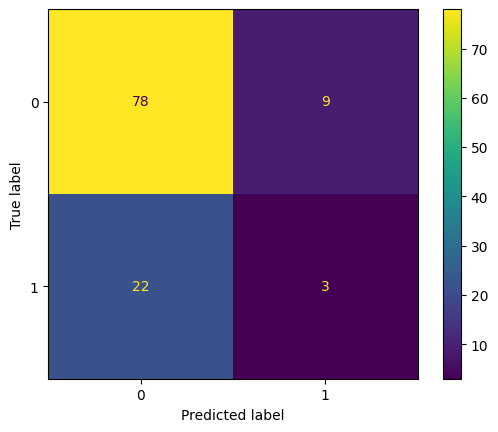

In [613]:

from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, preds),
                             display_labels = gs.classes_)

cmd.plot();

## KNN

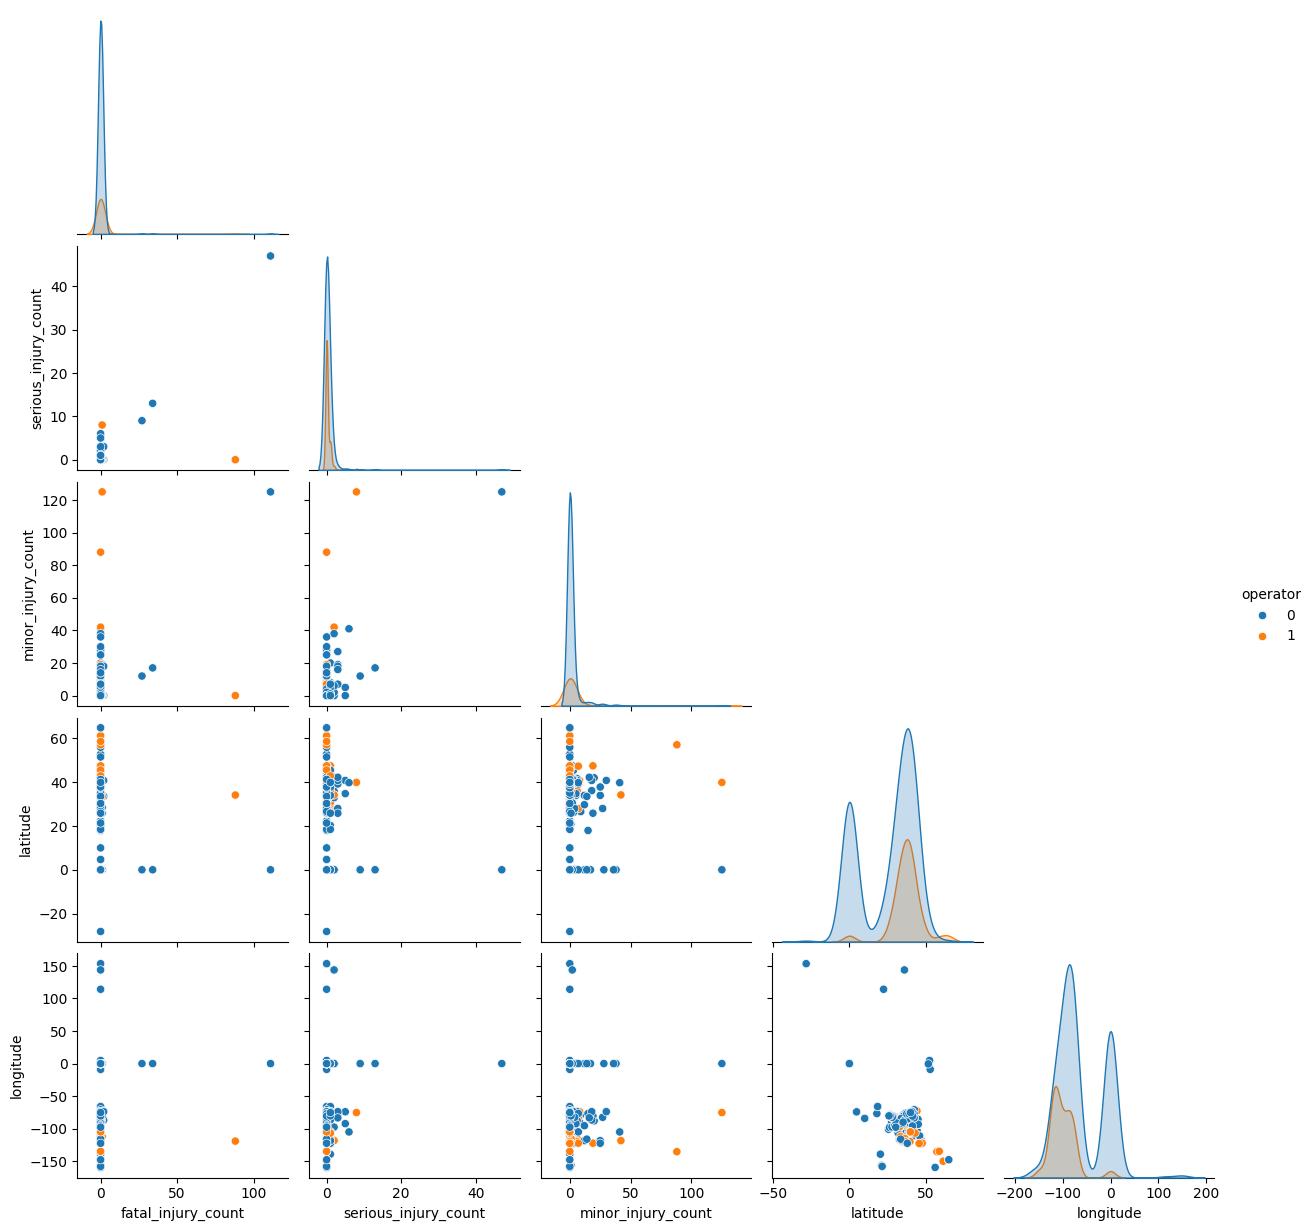

In [615]:
sns.pairplot(df, hue = 'operator', corner=True);

In [616]:
# highest_injury_## making simle model since kristinas was so overfit. 

In [617]:

X = df[['fatal_injury_count', 'serious_injury_count', 'minor_injury_count']]
y = df['operator']



In [618]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42, stratify=y)

In [619]:
#ss = StandardScaler()

#X_train_ss = ss.fit_transform(X_train)

#X_test_ss = ss.transform(X_test)

In [620]:
X_train

,fatal_injury_count,serious_injury_count,minor_injury_count
111,0,0,0
359,0,0,0
221,0,0,0
326,0,0,0
513,0,0,0
...,...,...,...
21,0,0,0
78,1,8,125
376,0,0,0
436,0,0,0


In [621]:
pd.DataFrame(X_train, columns = X_train.columns)

,fatal_injury_count,serious_injury_count,minor_injury_count
111,0,0,0
359,0,0,0
221,0,0,0
326,0,0,0
513,0,0,0
...,...,...,...
21,0,0,0
78,1,8,125
376,0,0,0
436,0,0,0


In [622]:
knn = KNeighborsClassifier()

In [623]:
cross_val_score(knn, X_train, y_train).mean()

0.7629213483146067

In [624]:

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [625]:

knn.score(X_train, y_train)

0.785234899328859

In [626]:
knn.score(X_test, y_test)

0.7678571428571429

In [627]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print(f'Training Score: {knn.score(X_train, y_train)}')
print(f'Testing Score: {knn.score(X_test, y_test)}')

Training Score: 0.7762863534675615
Testing Score: 0.7767857142857143


In [628]:

scores = []

for k in range(2, 30, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    acc_test = knn.score(X_test, y_test)
    scores.append((k, acc_train, acc_test))

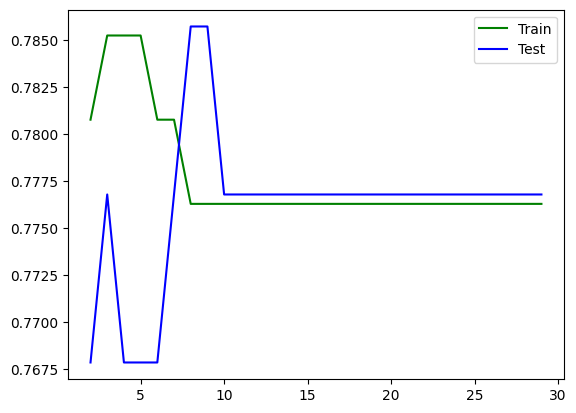

In [629]:
df_score = pd.DataFrame(scores, columns = ['k', 'acc_train', 'acc_test'])

plt.plot(df_score['k'], df_score['acc_train'], c='green', label = 'Train')
plt.plot(df_score['k'], df_score['acc_test'], c = 'blue', label = 'Test')
plt.legend();

In [630]:
#sorting k values, best is 8
df_score.sort_values(by = 'acc_test', ascending = False)

,k,acc_train,acc_test
6,8,0.776286,0.785714
7,9,0.776286,0.785714
1,3,0.785235,0.776786
5,7,0.780761,0.776786
10,12,0.776286,0.776786
9,11,0.776286,0.776786
11,13,0.776286,0.776786
8,10,0.776286,0.776786
15,17,0.776286,0.776786
14,16,0.776286,0.776786


In [631]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
print(f'Training Score: {knn.score(X_train, y_train)}')
print(f'Testing Score: {knn.score(X_test, y_test)}')

Training Score: 0.7762863534675615
Testing Score: 0.7857142857142857


In [632]:
pred = knn.predict(X_test)

In [633]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [634]:
knn.predict_proba(X_test)

array([[0.875, 0.125],
       [1.   , 0.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.5  , 0.5  ],
       [0.625, 0.375],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.875, 0.125],
       [1.   , 0.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1. 

In [635]:
cm = confusion_matrix(y_test, pred)
cm

array([[87,  0],
       [24,  1]])

In [636]:
cm.ravel()

array([87,  0, 24,  1])

In [637]:
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

87 0 24 1


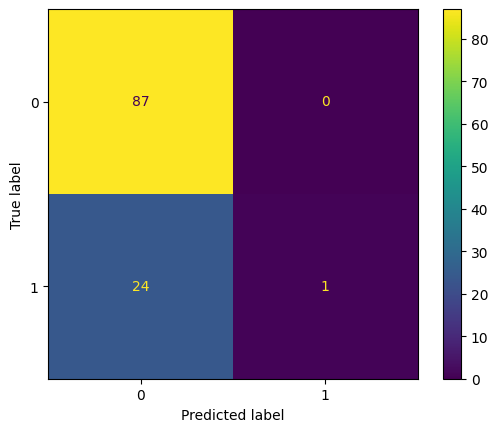

In [638]:
cmdis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs.classes_)

cmdis.plot()
#plt.savefig('../images/knn_conf_matrix_display_hh', dpi = 192);

### Random Forest

Testing Random Forest to see if any changes happen to scores.  

In [641]:
from sklearn.ensemble import RandomForestClassifier

In [664]:
y_train.value_counts(normalize=True)

operator
0    0.776286
1    0.223714
Name: proportion, dtype: float64

In [642]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [643]:

cross_val_score(rf_classifier, X_train, y_train, cv = 5).mean()

0.7628714107365793

In [644]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 1, 2, 3],
    'random_state': [42]
}

gs = GridSearchCV(rf_classifier, param_grid=rf_params, cv = 5)

gs.fit(X_train, y_train)
print(gs.best_score_) # best score - cross val
print(gs.best_params_)

0.778501872659176
{'max_depth': 2, 'n_estimators': 200, 'random_state': 42}


In [666]:
print(f'Training accuracy score is at {round(gs.score(X_train, y_train)* 100,2)}%')

print(f'Testing accuracy score is at {round(gs.score(X_test, y_test)* 100,2)}%')

Training accuracy score is at 78.08%
Testing accuracy score is at 76.79%


In [654]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [656]:
y_pred_rf = rf_classifier.predict(X_test)

In [672]:
print(f'This model has an accuracy score of {round(metrics.accuracy_score(y_test, pred) * 100,2)}%')

This model has an accuracy score of 78.57%


In [660]:
cm_rm = confusion_matrix(y_test, y_pred_rf)
cm_rm

array([[86,  1],
       [24,  1]])

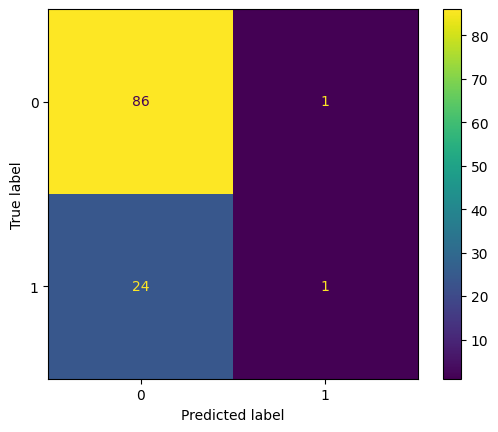

In [662]:
cmdis = ConfusionMatrixDisplay(confusion_matrix = cm_rm, display_labels = gs.classes_)

cmdis.plot()
#plt.savefig('../images/ran_for_conf_matrix_display_hh', dpi = 192);

In [676]:
# sensitivity
metrics.recall_score(y_test, y_pred_rf)

0.04

In [678]:
#specificity
tn / (tn +fp)

1.0

In [680]:
# precision
metrics.precision_score(y_test, y_pred_rf)

0.5